In [9]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [2]:
## load the dataset
data = pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data_norm = normalize(data)

data_norm = pd.DataFrame(data_norm, columns= data.columns)

data_norm.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [4]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    float64
 1   Region            440 non-null    float64
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    float64
 4   Grocery           440 non-null    float64
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    float64
 7   Delicassen        440 non-null    float64
dtypes: float64(8)
memory usage: 27.6 KB


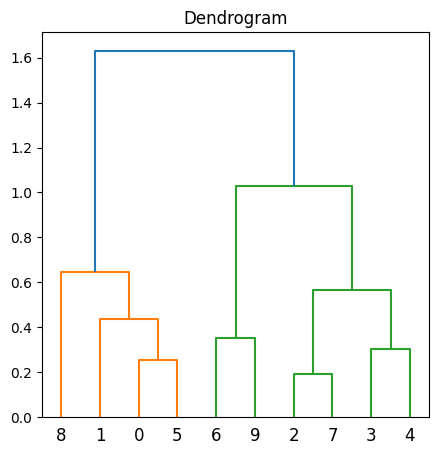

In [6]:
## dendrogram
subset_data = data_norm.sample(n=10)

plt.figure(figsize=(5,5))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(subset_data, method='ward'))

plt.show()

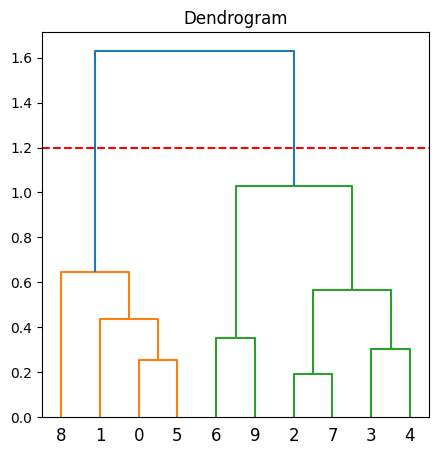

In [8]:
## break
plt.figure(figsize=(5,5))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(subset_data, method='ward'))
plt.axhline(y=1.2, color = 'r', linestyle = '--')

In [10]:
## dimensionalithy reduction using pca
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(data_norm)

In [21]:
## train model
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

now = cluster.fit_predict(reduced_data)

Text(0.5, 1.0, 'Scatter plot of wholesale data')

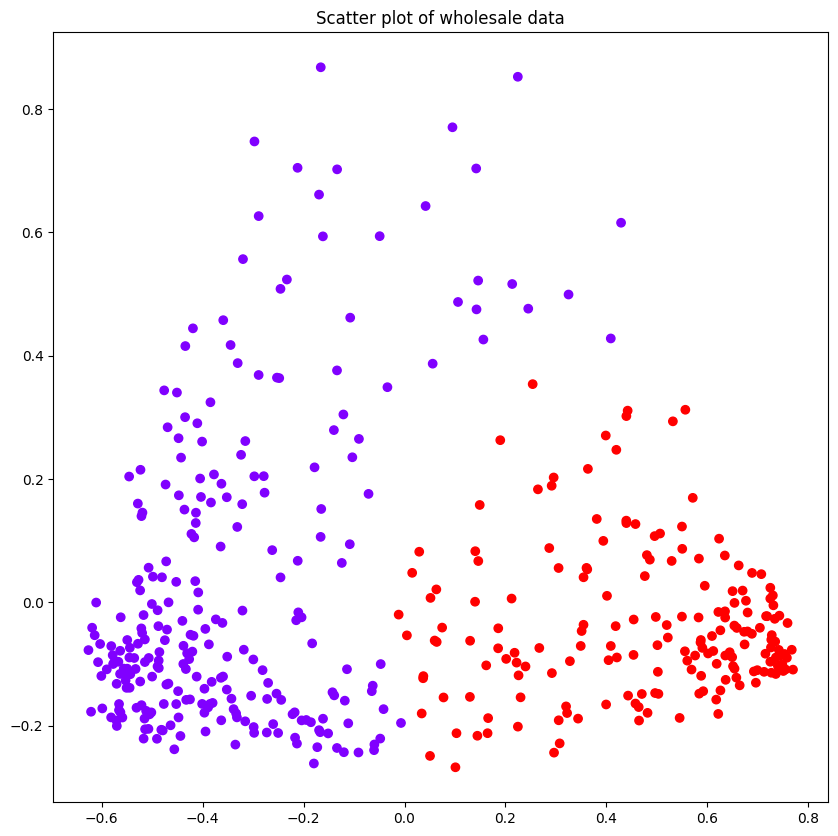

In [23]:
## visualize our cluster
plt.figure(figsize=(10,10))
plt.scatter(x=reduced_data[:,0], y = reduced_data[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Scatter plot of wholesale data')

In [24]:
cluster1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

now1= cluster.fit_predict(data_norm)

In [28]:
data_norm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Text(0.5, 1.0, 'Scatter plot of wholesale data')

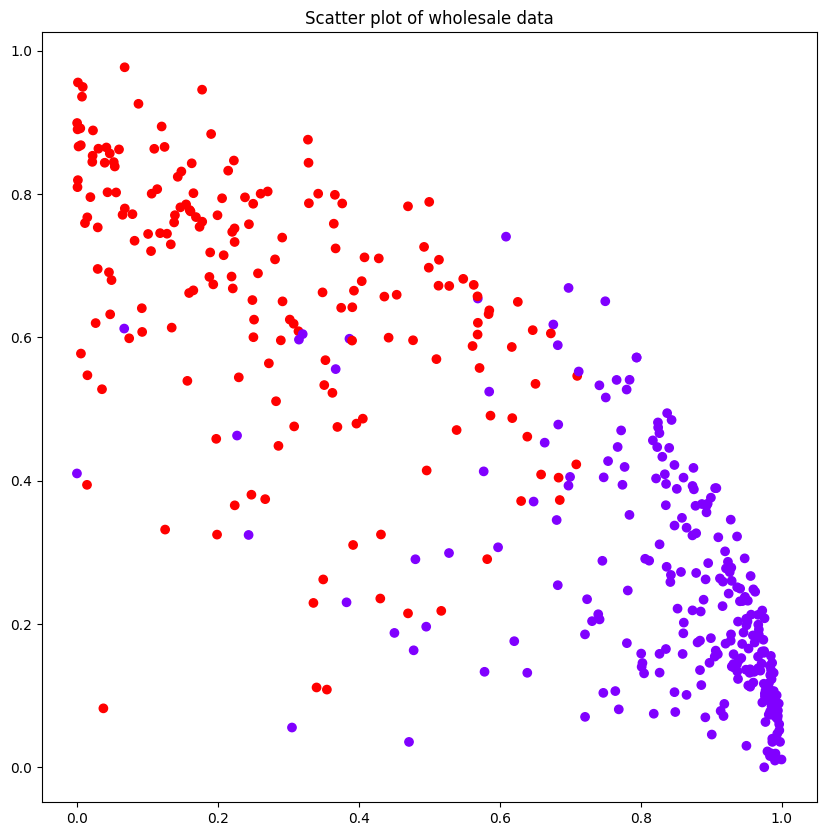

In [29]:
## visualize our cluster
plt.figure(figsize=(10,10))
plt.scatter(x=data_norm['Fresh'], y = data_norm['Grocery'], c=cluster.labels_, cmap='rainbow')
plt.title('Scatter plot of wholesale data')

In [30]:
df = pd.DataFrame({'reduced_cluster': now, 'data_norm_cluster': now1})

In [33]:
df.head()

,reduced_cluster,data_norm_cluster
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
